In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare and display NSW data

In [2]:
# Prepare NSW data
data = pd.read_csv('Fabi/master_dataset.csv', sep=',')

In [3]:
class CreateNSWDataset():
    def __init__(self, data, n_teachers=54000, school_teacher_ratio=1.2, teacher_per_school=15.,
                 std_dev_teacher_per_school=3., min_teachers_per_school=5, p_rural=0.3, p_car=0.7, p_experienced=0.4):
        self.data = data
        self.n_teachers = int(n_teachers / 1.05)
        self.n_schools = len(data)
        #self.n_schools = int(n_teachers * school_teacher_ratio / teacher_per_school)        
        self.teacher_per_school = teacher_per_school
        self.std_dev_teacher_per_school = std_dev_teacher_per_school
        self.min_teachers_per_school = min_teachers_per_school
        self.p_rural = p_rural
        self.p_car = p_car
        self.p_experienced = p_experienced
        
        self.big_cities = np.array([[151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.75, -32.916667],
                       [151.2, -33.3],
                       [150.893915, -34.427243],
                       [151.55, -32.716667],
                       [150.3, -33.7],
                       [153.55, -29.183333],
                       [147.368889, -35.118889],
                       [150.0, -37.5]])
        
    def _createTeachers_v2(self):
        loc_school = np.array([data['Longitude'], data['Latitude']]).T
        for _ in range(10):
            loc_school = np.concatenate((loc_school, self.big_cities))
        loc_school = np.resize(loc_school, (self.n_teachers,2))
        x_location = loc_school[:,0] + np.random.normal(0, 0.3, size=self.n_teachers)
        y_location = loc_school[:,1] + np.random.normal(0, 0.3, size=self.n_teachers)
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=self.n_teachers)
        car = np.random.choice([0, 1], p=[1 - self.p_car, self.p_car], size=self.n_teachers)
        experienced = np.random.choice([0, 1], p=[1 - self.p_experienced, self.p_experienced], size=self.n_teachers)
        teachers = {'x_location': x_location,
                    'y_location': y_location,
                    'rural': rural,
                    'car': car,
                    'experienced': experienced,
                    }

        return teachers
    
    def _createSchools(self):
        loc_school = np.array([data['Longitude'], data['Latitude']]).T
        x_location = loc_school[:,0]
        y_location = loc_school[:,1]
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=len(loc_school))
        n_teachers = self.data["latest_year_enrolment_FTE"] / self.teacher_per_school
        
        schools = {'ID': range(len(loc_school)),
                   'x_location': x_location,
                   'y_location': y_location,
                   'rural': rural,
                   'n_teachers': n_teachers,
                   }

        return schools

    def make_dataset(self):
        teachers = pd.DataFrame(self._createTeachers_v2())
        schools = pd.DataFrame(self._createSchools())

        return teachers, schools

In [4]:
DatasetSampler = CreateNSWDataset(data)
teachers, schools = DatasetSampler.make_dataset()

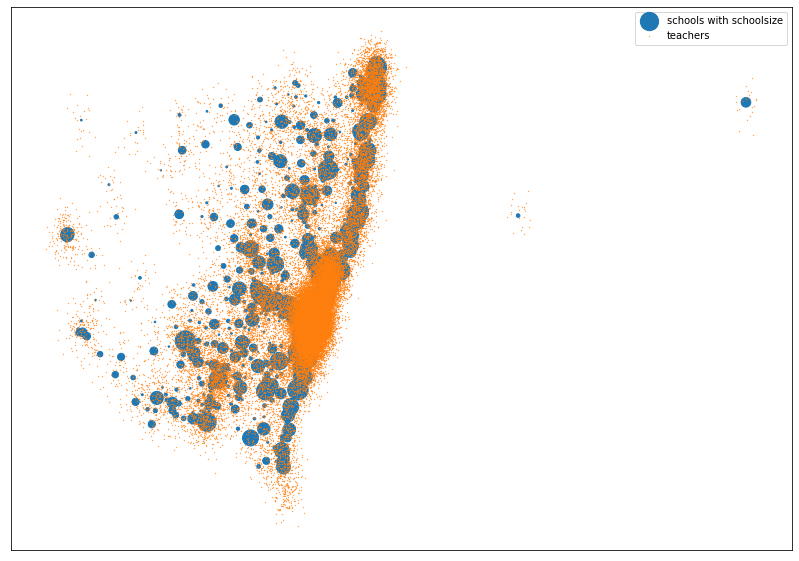

In [5]:
n_students = data["latest_year_enrolment_FTE"]

plt.figure(figsize=(14,10))
plt.scatter(schools["x_location"], schools["y_location"], s = n_students/3, label="schools with schoolsize")
plt.scatter(teachers["x_location"], teachers["y_location"], label="teachers", s=0.1)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

# Prepare and display GER data

In [6]:
# Prepare GER data
data_ger = pd.read_csv('Fabi/de.csv', sep=',')
data_ger.drop(np.arange(592,603), inplace=True)

In [7]:
class CreateGERDataset():
    def __init__(self, data, n_teachers=90000, school_teacher_ratio=1.2, teacher_per_school=15.,
                 std_dev_teacher_per_school=3., min_teachers_per_school=5, p_rural=0.3, p_car=0.7, p_experienced=0.4):
        self.data = data
        self.n_teachers = int(n_teachers / 1.05)
        self.n_schools = len(data)
        #self.n_schools = int(n_teachers * school_teacher_ratio / teacher_per_school)        
        self.teacher_per_school = teacher_per_school
        self.std_dev_teacher_per_school = std_dev_teacher_per_school
        self.min_teachers_per_school = min_teachers_per_school
        self.p_rural = p_rural
        self.p_car = p_car
        self.p_experienced = p_experienced
    
   
    def _createTeachers(self):
        loc_school = np.array([self.data['lng'], self.data['lat']]).T
        for _ in range(10):
            loc_school = np.concatenate((loc_school, loc_school[0:40]))
        loc_school = np.resize(loc_school, (self.n_teachers,2))
        x_location = loc_school[:,0] + np.random.normal(0, 0.3, size=self.n_teachers)
        y_location = loc_school[:,1] + np.random.normal(0, 0.3, size=self.n_teachers)
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=self.n_teachers)
        car = np.random.choice([0, 1], p=[1 - self.p_car, self.p_car], size=self.n_teachers)
        experienced = np.random.choice([0, 1], p=[1 - self.p_experienced, self.p_experienced], size=self.n_teachers)
        teachers = {'x_location': x_location,
                    'y_location': y_location,
                    'rural': rural,
                    'car': car,
                    'experienced': experienced,
                    }
        return teachers
    
    def _createSchools(self):
        loc_school = np.array([self.data['lng'], self.data['lat']]).T
        x_location = loc_school[:,0]
        y_location = loc_school[:,1]
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=len(loc_school))
        n_teachers = self.data["population"] * 0.18 / self.teacher_per_school
        
        schools = {'ID': range(len(loc_school)),
                   'x_location': x_location,
                   'y_location': y_location,
                   'rural': rural,
                   'n_teachers': n_teachers,
                   }

        return schools

    def make_dataset(self):
        teachers = pd.DataFrame(self._createTeachers())
        schools = pd.DataFrame(self._createSchools())

        return teachers, schools

In [8]:
DatasetSampler = CreateGERDataset(data_ger)
teachers_ger, schools_ger = DatasetSampler.make_dataset()

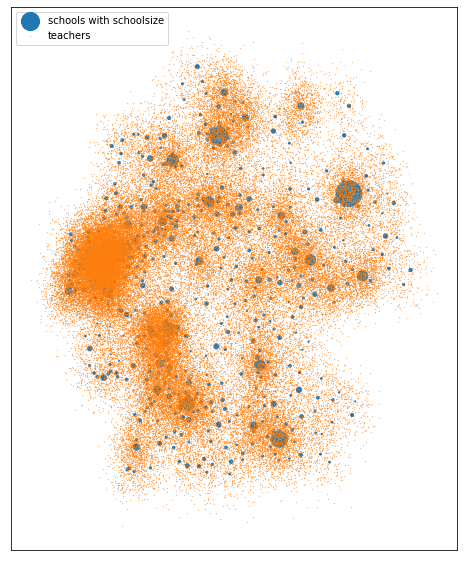

In [9]:
n_students_ger = data_ger["population"] * 0.18 /1000

plt.figure(figsize=(8,10))
plt.scatter(schools_ger["x_location"], schools_ger["y_location"], s=n_students_ger, label="schools with schoolsize")
plt.scatter(teachers_ger["x_location"], teachers_ger["y_location"], label="teachers", s=0.05)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()